In [1]:
import pandas as pd


In [2]:
path ="600092_data.csv" 

In [3]:
df = pd.read_csv(path, encoding = 'utf-8')

In [4]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


# Testing for null values using var

In [5]:
var = df['label']
var.isnull().sum()

3

# Data visualization trial (BM)

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

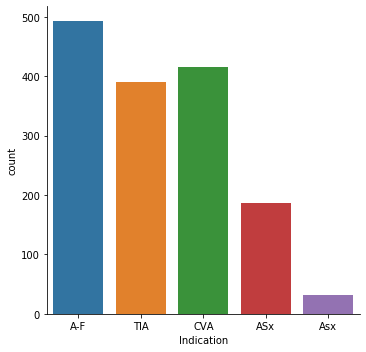

In [8]:
sns.catplot('Indication', data = df, kind='count' )

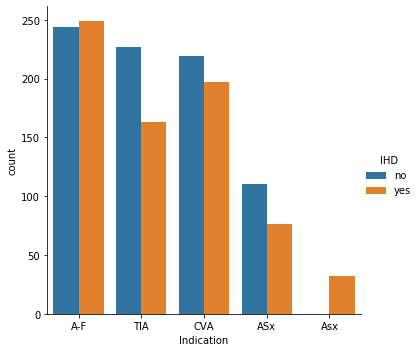

In [9]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

# DATA NEEDS CLEANING AT ASX

In [10]:
df['Indication'] = df['Indication'].replace(['Asx'], 'ASx')

In [11]:
for index, row in df.iterrows(): 
     if ((row["Indication"])== "Asx"):
       print(row["Indication"])

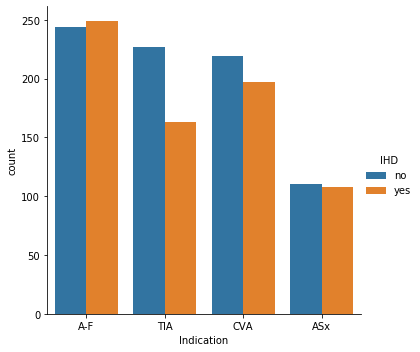

In [12]:
sns.catplot('Indication', data = df, kind='count', hue = 'IHD')

# DID MY FIRSTCLEANING XD

In [13]:
df['Indication'].isnull().sum()

3

In [14]:
df.describe()

,Random,Id,IPSI
count,1520.000000,1520.000000,1516.000000
mean,0.509545,188365.022368,78.872032
std,0.284006,64355.870242,10.162351
min,0.000295,78261.000000,35.000000
25%,0.268531,137130.750000,73.000000
50%,0.517616,191344.500000,77.000000
75%,0.754724,244559.500000,85.000000
max,0.999448,295978.000000,99.000000


In [15]:
df1 = df[df.isna().any(axis=1)]
print (df1)

        Random      Id Indication Diabetes  IHD Hypertension Arrhythmia  \
201   0.388790  240232        CVA      yes   no          NaN        yes   
337   0.617072  260770        CVA       no  yes           no         no   
442   0.648122  261060        NaN       no  yes          yes         no   
447   0.681744  224257        CVA      NaN  yes          yes        yes   
514   0.392130  210861        A-F      NaN   no          yes         no   
590   0.707950  289096        A-F       no   no          NaN         no   
620   0.283872  227779        A-F       no   no           no         no   
752   0.243518  146415        CVA       no  yes          yes        yes   
784   0.243645  196483        CVA       no   no          yes        yes   
812   0.756938  190671        CVA       no  yes          yes         no   
822   0.211760  205845        NaN       no  yes           no         no   
845   0.920096  104176        CVA       no   no           no         no   
916   0.004501  281679   

##Filling nan in ipsi


In [16]:
##check for duplicate vals
for x in  df.duplicated(subset='Random', keep=False):
    if x == 'True':
        print(x)

In [17]:
f =  df.duplicated(subset='Random', keep=False)
type(f)

pandas.core.series.Series

In [18]:
print(f)

0        True
1        True
2        True
3       False
4       False
        ...  
1515     True
1516    False
1517    False
1518    False
1519    False
Length: 1520, dtype: bool


In [19]:
count = -1
count3 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        ##print(x, count)
        List.append(count)
        count3 = count3 + 1

In [20]:
List2 = []
for index, row in df.iterrows():
    if index in List:
        List2.append(row)

In [21]:
List2

[Random          0.602437
 Id                218242
 Indication           A-F
 Diabetes              no
 IHD                   no
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  78
 Contra               20 
 label             NoRisk
 Name: 0, dtype: object, Random          0.602437
 Id                159284
 Indication           TIA
 Diabetes              no
 IHD                   no
 Hypertension          no
 Arrhythmia            no
 History               no
 IPSI                  70
 Contra               60 
 label             NoRisk
 Name: 1, dtype: object, Random          0.602437
 Id                106066
 Indication           A-F
 Diabetes              no
 IHD                  yes
 Hypertension         yes
 Arrhythmia            no
 History               no
 IPSI                  95
 Contra                40
 label               Risk
 Name: 2, dtype: object, Random          0.678157
 Id                256128
 Indication       

In [22]:
List

[0,
 1,
 2,
 8,
 10,
 13,
 15,
 16,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 84,
 86,
 88,
 90,
 92,
 101,
 104,
 106,
 108,
 110,
 112,
 114,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 176,
 178,
 180,
 182,
 184,
 188,
 189,
 190,
 192,
 194,
 196,
 198,
 199,
 212,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 228,
 230,
 231,
 232,
 233,
 237,
 244,
 245,
 247,
 248,
 249,
 254,
 255,
 256,
 258,
 260,
 261,
 262,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 300,
 302,
 304,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 325,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 344,
 346,
 350,
 356,
 358,
 360,
 362,
 364,
 366,
 368,
 369,
 370,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 386,
 387,
 388,


In [23]:
import random
List3 = []
for item in List2:
    randomNumber = random.uniform(0, 1)
    if randomNumber != df['Random'].count():
        List3.append(randomNumber)
        item['Random'] = randomNumber
        print(item)

Random          0.800144
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
Random          0.526629
Id                159284
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 1, dtype: object
Random          0.76626
Id               106066
Indication          A-F
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 95
Contra               40
label              Risk
Name: 2, dtype: object
Random          0.646618
Id                256128
Indication           TIA
Diabetes              no
IHD              

Random          0.219822
Id                115852
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  81
Contra               80 
label             NoRisk
Name: 664, dtype: object
Random          0.836825
Id                150640
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               50 
label             NoRisk
Name: 665, dtype: object
Random          0.546224
Id                196364
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  79
Contra               73 
label             NoRisk
Name: 666, dtype: object
Random          0.928559
Id                259698
Indication           CVA
Diabetes             yes


Random          0.375977
Id                 97821
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia           yes
History               no
IPSI                  80
Contra                30
label               Risk
Name: 1311, dtype: object
Random          0.268303
Id                114076
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  65
Contra               15 
label             NoRisk
Name: 1312, dtype: object
Random          0.921485
Id                195540
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  76
Contra               60 
label             NoRisk
Name: 1316, dtype: object
Random          0.313411
Id                261302
Indication           A-F
Diabetes              

In [24]:
##refer each random number to index
##i wanna loop through each index(list) and random number(list3) at the same time
counter1 = 0
for item in List:
    x = df.loc[item,:]
    x.values[0]=List3[counter1]
    df.loc[item,:] = x
    counter1 = counter1 + 1
    print(x)

Random          0.800144
Id                218242
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  78
Contra               20 
label             NoRisk
Name: 0, dtype: object
Random          0.526629
Id                159284
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 1, dtype: object
Random          0.76626
Id               106066
Indication          A-F
Diabetes             no
IHD                 yes
Hypertension        yes
Arrhythmia           no
History              no
IPSI                 95
Contra               40
label              Risk
Name: 2, dtype: object
Random          0.646618
Id                256128
Indication           TIA
Diabetes              no
IHD              

Random          0.642782
Id                232028
Indication           ASx
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 60, dtype: object
Random          0.652637
Id                 97462
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  68
Contra               20 
label             NoRisk
Name: 61, dtype: object
Random          0.670134
Id                101697
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  75
Contra               25 
label             NoRisk
Name: 62, dtype: object
Random          0.661559
Id                 90643
Indication           A-F
Diabetes              no
IHD

Random          0.0823568
Id                 261596
Indication            ASx
Diabetes               no
IHD                    no
Hypertension           no
Arrhythmia             no
History                no
IPSI                   78
Contra                35 
label              NoRisk
Name: 180, dtype: object
Random          0.271602
Id                 97917
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 182, dtype: object
Random          0.867706
Id                234684
Indication           ASx
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  76
Contra               30 
label             NoRisk
Name: 184, dtype: object
Random          0.250576
Id                287536
Indication           A-F
Diabetes      

Random          0.682476
Id                175170
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               75 
label             NoRisk
Name: 261, dtype: object
Random          0.389819
Id                234112
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History              yes
IPSI                  80
Contra                50
label               Risk
Name: 262, dtype: object
Random          0.0963142
Id                 259122
Indication            TIA
Diabetes               no
IHD                   yes
Hypertension          yes
Arrhythmia             no
History                no
IPSI                   76
Contra                50 
label              NoRisk
Name: 264, dtype: object
Random          0.408278
Id                293485
Indication           A-F
Diabetes      

Random          0.192117
Id                156787
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  82
Contra               60 
label             NoRisk
Name: 370, dtype: object
Random          0.350227
Id                191720
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra                70
label               Risk
Name: 372, dtype: object
Random          0.318661
Id                103832
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  95
Contra                85
label               Risk
Name: 373, dtype: object
Random          0.916537
Id                155926
Indication           A-F
Diabetes              no


Random          0.313959
Id                 94561
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  78
Contra               60 
label             NoRisk
Name: 449, dtype: object
Random          0.794043
Id                 87681
Indication           A-F
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               40 
label             NoRisk
Name: 450, dtype: object
Random          0.640126
Id                271479
Indication           A-F
Diabetes             yes
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 456, dtype: object
Random          0.571136
Id                 88086
Indication           ASx
Diabetes              no


Name: 603, dtype: object
Random          0.533977
Id                175986
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               60 
label             NoRisk
Name: 604, dtype: object
Random          0.231873
Id                280886
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               40 
label             NoRisk
Name: 606, dtype: object
Random          0.0356135
Id                 138810
Indication            A-F
Diabetes               no
IHD                    no
Hypertension           no
Arrhythmia            yes
History                no
IPSI                   95
Contra                100
label                Risk
Name: 607, dtype: object
Random          0.675572
Id                222474
Indication    

Random          0.176243
Id                233870
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  51
Contra               51 
label             NoRisk
Name: 697, dtype: object
Random          0.302758
Id                175354
Indication           A-F
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  80
Contra               20 
label             NoRisk
Name: 698, dtype: object
Random          0.107861
Id                228766
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension          no
Arrhythmia            no
History               no
IPSI                  73
Contra               80 
label             NoRisk
Name: 700, dtype: object
Random          0.983834
Id                249276
Indication           A-F
Diabetes              no


Name: 814, dtype: object
Random          0.116024
Id                 79854
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               85 
label             NoRisk
Name: 816, dtype: object
Random          0.216986
Id                279759
Indication           TIA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  80
Contra               60 
label             NoRisk
Name: 818, dtype: object
Random          0.754033
Id                167352
Indication           CVA
Diabetes             yes
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  90
Contra               100
label               Risk
Name: 820, dtype: object
Random          0.101736
Id                205845
Indication           NaN


Name: 932, dtype: object
Random          0.0942828
Id                 189924
Indication            A-F
Diabetes               no
IHD                    no
Hypertension           no
Arrhythmia             no
History                no
IPSI                   90
Contra                30 
label              NoRisk
Name: 933, dtype: object
Random          0.903784
Id                219944
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  75
Contra               60 
label             NoRisk
Name: 936, dtype: object
Random          0.83247
Id               210302
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 70
Contra              50 
label            NoRisk
Name: 939, dtype: object
Random          0.816491
Id                219632
Indication           CVA


Name: 1060, dtype: object
Random          0.633084
Id                163118
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  50
Contra               40 
label             NoRisk
Name: 1062, dtype: object
Random          0.247355
Id                 83371
Indication           A-F
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  60
Contra               100
label               Risk
Name: 1063, dtype: object
Random          0.211404
Id                251228
Indication           TIA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  55
Contra               35 
label             NoRisk
Name: 1064, dtype: object
Random          0.0358664
Id                 186440
Indication         

Name: 1132, dtype: object
Random          0.065471
Id                 98556
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  73
Contra               50 
label             NoRisk
Name: 1134, dtype: object
Random          0.0131361
Id                 114150
Indication            TIA
Diabetes               no
IHD                    no
Hypertension          yes
Arrhythmia             no
History                no
IPSI                   73
Contra                40 
label              NoRisk
Name: 1135, dtype: object
Random          0.618913
Id                251737
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  80
Contra               20 
label             NoRisk
Name: 1136, dtype: object
Random          0.796599
Id                201841
Indication

Random          0.296286
Id                276637
Indication           CVA
Diabetes              no
IHD                   no
Hypertension          no
Arrhythmia            no
History               no
IPSI                  70
Contra               50 
label             NoRisk
Name: 1246, dtype: object
Random          0.0538336
Id                 271514
Indication            CVA
Diabetes               no
IHD                   yes
Hypertension           no
Arrhythmia             no
History                no
IPSI                   90
Contra                20 
label              NoRisk
Name: 1247, dtype: object
Random          0.502075
Id                120590
Indication           TIA
Diabetes             yes
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  90
Contra               100
label               Risk
Name: 1250, dtype: object
Random          0.585697
Id                189796
Indication           CVA
Diabetes   

Random          0.14727
Id               103008
Indication          TIA
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 70
Contra             100 
label            NoRisk
Name: 1404, dtype: object
Random          0.976935
Id                 83319
Indication           CVA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  70
Contra               20 
label             NoRisk
Name: 1406, dtype: object
Random          0.12002
Id               234320
Indication          TIA
Diabetes             no
IHD                 yes
Hypertension         no
Arrhythmia           no
History              no
IPSI                 70
Contra              50 
label            NoRisk
Name: 1408, dtype: object
Random          0.417945
Id                174063
Indication           TIA
Diabetes              no
IHD                

In [25]:
 y = df.loc[63,:]

In [26]:
y

Random          0.53363
Id               210968
Indication          A-F
Diabetes             no
IHD                  no
Hypertension         no
Arrhythmia           no
History              no
IPSI                 75
Contra              30 
label            NoRisk
Name: 63, dtype: object

In [27]:
y.values[0] = 1

In [28]:
y.values[0]

1

In [29]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.800144,218242,A-F,no,no,yes,no,no,78.0,20,NoRisk
1,0.526629,159284,TIA,no,no,no,no,no,70.0,60,NoRisk
2,0.766260,106066,A-F,no,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.915988,93406,A-F,no,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,70.0,45,NoRisk


In [30]:
df.loc[8,:]

Random          0.646618
Id                256128
Indication           TIA
Diabetes              no
IHD                   no
Hypertension         yes
Arrhythmia            no
History               no
IPSI                  81
Contra               20 
label             NoRisk
Name: 8, dtype: object

In [31]:
df.loc[10,:]

Random          0.779925
Id                174588
Indication           CVA
Diabetes              no
IHD                  yes
Hypertension         yes
Arrhythmia           yes
History               no
IPSI                  75
Contra                50
label               Risk
Name: 10, dtype: object

In [32]:
List

[0,
 1,
 2,
 8,
 10,
 13,
 15,
 16,
 19,
 20,
 22,
 24,
 25,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 44,
 46,
 48,
 50,
 52,
 54,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 64,
 66,
 68,
 70,
 72,
 74,
 76,
 78,
 84,
 86,
 88,
 90,
 92,
 101,
 104,
 106,
 108,
 110,
 112,
 114,
 132,
 134,
 136,
 138,
 140,
 142,
 144,
 146,
 148,
 150,
 152,
 153,
 154,
 155,
 156,
 158,
 160,
 162,
 164,
 166,
 168,
 170,
 176,
 178,
 180,
 182,
 184,
 188,
 189,
 190,
 192,
 194,
 196,
 198,
 199,
 212,
 214,
 216,
 217,
 219,
 220,
 222,
 224,
 225,
 226,
 228,
 230,
 231,
 232,
 233,
 237,
 244,
 245,
 247,
 248,
 249,
 254,
 255,
 256,
 258,
 260,
 261,
 262,
 264,
 265,
 266,
 268,
 269,
 270,
 272,
 274,
 276,
 278,
 280,
 282,
 284,
 286,
 300,
 302,
 304,
 308,
 310,
 312,
 314,
 316,
 318,
 320,
 322,
 325,
 328,
 330,
 332,
 334,
 336,
 338,
 340,
 344,
 346,
 350,
 356,
 358,
 360,
 362,
 364,
 366,
 368,
 369,
 370,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 380,
 382,
 383,
 386,
 387,
 388,


In [33]:
f =  df.duplicated(subset='Random', keep=False)
count = -1
count2 = 0
List = []
t = True
for x in f:
    count= count + 1
    if(x==t):
        count2 = count2 + 1
        print(x, count)
        List.append(count)

In [34]:
count2

0

In [35]:
count3

571

In [36]:
diabetes  = df['Diabetes']

In [37]:
diabetes

0       no
1       no
2       no
3       no
4       no
        ..
1515    no
1516    no
1517    no
1518    no
1519    no
Name: Diabetes, Length: 1520, dtype: object

In [38]:
j = diabetes.notnull()

In [39]:

count = -1
count2 = 0
List = []
t = False
for x in j:
    count= count + 1
    if(x==t):
        count2 = count2 + 1
        List.append(count)
        

# transform ipsi and contra into nominal values

In [40]:
contra = df['Contra']

In [41]:
contra

0       20 
1       60 
2        40
3        85
4       20 
       ... 
1515    60 
1516     75
1517    20 
1518    45 
1519    20 
Name: Contra, Length: 1520, dtype: object

In [42]:
ipsi = df['IPSI']

In [43]:
type (contra)

pandas.core.series.Series

In [44]:
##transforming contras to floats
counter1 = 0
for item in contra:
    x = df.loc[counter1,:]
    if(x.values[9]== " "):
        x.values[9] = "0.0"
    
    x.values[9]=float(x.values[9])
    df.loc[counter1,:] = x
    counter1 = counter1 + 1

{'whiskers': [<matplotlib.lines.Line2D at 0x1f94588fbc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1f94588fd88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f94588f348>],
 'medians': [<matplotlib.lines.Line2D at 0x1f945893f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f945898b08>],
 'means': []}

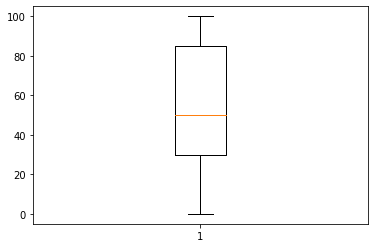

In [45]:
plt.boxplot(df.Contra.fillna(0))

{'whiskers': [<matplotlib.lines.Line2D at 0x1f9458f0d08>,
 'caps': [<matplotlib.lines.Line2D at 0x1f9458f0e88>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f9458f04c8>],
 'medians': [<matplotlib.lines.Line2D at 0x1f9458f4e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1f9458f4f08>],
 'means': []}

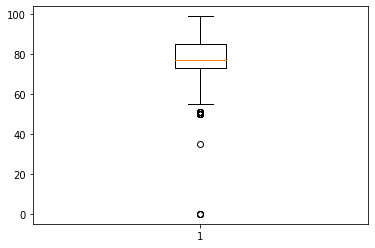

In [46]:
plt.boxplot(df.IPSI.fillna(0))

# RANGE FOR IPSI AND CONTRA FOR ASSOCIATION

In [47]:
##llmao i dont need a boxplt. do ipsi.describe
ipsi.describe()

count    1516.000000
mean       78.872032
std        10.162351
min        35.000000
25%        73.000000
50%        77.000000
75%        85.000000
max        99.000000
Name: IPSI, dtype: float64

In [48]:
df['Contra'].describe()

count    1520.000000
mean       56.790789
std        29.561904
min         0.000000
25%        30.000000
50%        50.000000
75%        85.000000
max       100.000000
Name: Contra, dtype: float64

In [49]:
##as per data description
ipsi_rng = []
COUNT = 0
for item in ipsi:
    if 0<= item<=73:
        x = str("Low")
        ipsi[COUNT] = x
    elif 74<= item<=84:
        x = str("Medium")
        ipsi[COUNT] = x
    elif item>=85:
        x = str("High")
        ipsi[COUNT] = x
    COUNT = COUNT + 1

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\scowt\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [50]:
df['IPSI'] = ipsi

In [51]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.800144,218242,A-F,no,no,yes,no,no,Medium,20,NoRisk
1,0.526629,159284,TIA,no,no,no,no,no,Low,60,NoRisk
2,0.766260,106066,A-F,no,yes,yes,no,no,High,40,Risk
3,0.128157,229592,TIA,no,no,yes,no,no,High,85,Risk
4,0.676862,245829,CVA,no,no,no,no,no,Low,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.915988,93406,A-F,no,yes,no,no,no,Medium,60,NoRisk
1516,0.253504,121814,A-F,no,no,yes,yes,no,High,75,Risk
1517,0.620373,101754,TIA,no,no,yes,no,no,Medium,20,NoRisk
1518,0.639342,263836,A-F,no,yes,no,no,no,Low,45,NoRisk


In [52]:
contra = df['Contra']
COUNT = 0
for item in contra:
    if 0<= item<=49:
        x = str("Low Contra")
        contra[COUNT] = x
    elif 50<= item<=80:
        x = str("Medium Contra")
        contra[COUNT] = x
    elif item>=81:
        x = str("High Contra")
        contra[COUNT] = x
    COUNT = COUNT + 1

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [53]:
df['Contra']= contra

In [54]:
arr = df['Arrhythmia']
hypertension = df['Hypertension']
ihd = df['IHD']
hist = df['History']

In [55]:
c = 0
for item in arr:
    if item == "no":
        arr[c] = "no arrhymia"
    elif item == "yes":
        arr[c] = "yes arrhymia"
    c = c + 1  
    
c = 0
for item in hypertension:
    if item == "no":
        hypertension[c] = "no hypertension"
    elif item == "yes":
        hypertension[c] = "yes hypertension"
    c = c + 1 
    
c = 0
for item in ihd:
    if item == "no":
        ihd[c] = "no ihd"
    elif item == "yes":
        ihd[c] = "yes ihd"
    c = c + 1 
    
c = 0
for item in hist:
    if item == "no":
        hist[c] = "no history"
    elif item == "yes":
        hist[c] = "yes history"
    c = c + 1 
    


C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launch

In [56]:
df['Arrhythmia'] = arr
df['IHD'] = ihd
df['Hypertension'] = hypertension
df['History'] = hist

In [57]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.800144,218242,A-F,no,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1,0.526629,159284,TIA,no,no ihd,no hypertension,no arrhymia,no history,Low,Medium Contra,NoRisk
2,0.766260,106066,A-F,no,yes ihd,yes hypertension,no arrhymia,no history,High,Low Contra,Risk
3,0.128157,229592,TIA,no,no ihd,yes hypertension,no arrhymia,no history,High,High Contra,Risk
4,0.676862,245829,CVA,no,no ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.915988,93406,A-F,no,yes ihd,no hypertension,no arrhymia,no history,Medium,Medium Contra,NoRisk
1516,0.253504,121814,A-F,no,no ihd,yes hypertension,yes arrhymia,no history,High,Medium Contra,Risk
1517,0.620373,101754,TIA,no,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1518,0.639342,263836,A-F,no,yes ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk


# Now for association. values to consider are basically all nominal values which have a NaN

In [58]:
##84 combinations
##20!/(8!(20-8)!) = 125970 combinations


In [59]:

ass= pd.DataFrame(ihd)
ass['contra'] = contra
ass['History'] = hist
ass['Hypertension'] = hypertension
ass['ipsi'] = ipsi
ass['indication'] = df['Indication']
ass['diabetes'] = df['Diabetes']
ass['arrhymia'] = df['Arrhythmia']

In [60]:
ass

,IHD,contra,History,Hypertension,ipsi,indication,diabetes,arrhymia
0,no ihd,Low Contra,no history,yes hypertension,Medium,A-F,no,no arrhymia
1,no ihd,Medium Contra,no history,no hypertension,Low,TIA,no,no arrhymia
2,yes ihd,Low Contra,no history,yes hypertension,High,A-F,no,no arrhymia
3,no ihd,High Contra,no history,yes hypertension,High,TIA,no,no arrhymia
4,no ihd,Low Contra,no history,no hypertension,Low,CVA,no,no arrhymia
...,...,...,...,...,...,...,...,...
1515,yes ihd,Medium Contra,no history,no hypertension,Medium,A-F,no,no arrhymia
1516,no ihd,Medium Contra,no history,yes hypertension,High,A-F,no,yes arrhymia
1517,no ihd,Low Contra,no history,yes hypertension,Medium,TIA,no,no arrhymia
1518,yes ihd,Low Contra,no history,no hypertension,Low,A-F,no,no arrhymia


In [61]:
ass_list = ass.values.tolist()

In [62]:
ass_list

[['no ihd',
  'Low Contra',
  'no history',
  'yes hypertension',
  'Medium',
  'A-F',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Medium Contra',
  'no history',
  'no hypertension',
  'Low',
  'TIA',
  'no',
  'no arrhymia'],
 ['yes ihd',
  'Low Contra',
  'no history',
  'yes hypertension',
  'High',
  'A-F',
  'no',
  'no arrhymia'],
 ['no ihd',
  'High Contra',
  'no history',
  'yes hypertension',
  'High',
  'TIA',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Low Contra',
  'no history',
  'no hypertension',
  'Low',
  'CVA',
  'no',
  'no arrhymia'],
 ['no ihd',
  'High Contra',
  'no history',
  'no hypertension',
  'High',
  'A-F',
  'no',
  'yes arrhymia'],
 ['yes ihd',
  'High Contra',
  'no history',
  'yes hypertension',
  'High',
  'A-F',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Medium Contra',
  'no history',
  'no hypertension',
  'Medium',
  'CVA',
  'no',
  'no arrhymia'],
 ['no ihd',
  'Low Contra',
  'no history',
  'yes hypertension',
  'Medium',
  'TIA',
  'no',
  'no a

In [63]:
records = []
for record in ass_list:
    new_item = pd.Series(record).dropna().values.tolist()
    records.append(new_item)
    print(new_item)

['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'CVA', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'Medium Contra', 'no his

['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'yes arrhymia']
['yes ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'A-F', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'yes', 'yes arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'CVA', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'CVA', 'no', 'yes arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'Low', 'A-F', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no hypertension', 'High', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes

['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'yes arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'High', 'A-F', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Medium', 'ASx', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'CVA', 'no', 'yes arrhymia']
['yes ihd', 'High Contra', 'no history', 'yes hypertension', 'High', 'ASx', 'no', 'yes arrhymia']
['yes ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'ASx', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['no ihd', 'Low Co

['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'High', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'High', 'ASx', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'High', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'ASx', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no h

['no ihd', 'Medium Contra', 'yes history', 'no hypertension', 'High', 'TIA', 'yes', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'no hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'TIA', 'no', 'no arrhymia']
['no ihd', 'High Contra', 'no history', 'no hypertension', 'High', 'A-F', 'no', 'yes arrhymia']
['no ihd', 'High Contra', 'no history', 'yes hypertension', 'Low', 'TIA', 'no', 'no arrhymia']
['no ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Low', 'ASx', 'no', 'no arrhymia']
['no ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'A-F', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'yes hypertension', 'Medium', 'CVA', 'no', 'no arrhymia']
['yes ihd', 'Low Contra', 'no history', 'no hypertension', 'Medium', 'ASx', 'no', 'no arrhymia']
['yes ihd', 'Medium Contra', 'no history', 'yes hypertension', 'Medium', 'ASx', 'yes', 'no arrhymia']
['yes ihd', 'Medium Co

In [64]:
from apyori import apriori
asso_rules = list( apriori(records, min_support = 0.004, min_confidence = 0.2,min_lift = 4,min_length = 5))

In [65]:
print(f"No of rules: {len(asso_rules)}\n")
for rule in asso_rules:
    print(rule)

No of rules: 278

RelationRecord(items=frozenset({'ASx', 'Medium', 'yes'}), support=0.006578947368421052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Medium', 'yes'}), items_add=frozenset({'ASx'}), confidence=0.6666666666666666, lift=4.648318042813456)])
RelationRecord(items=frozenset({'TIA', 'High', 'yes'}), support=0.0125, ordered_statistics=[OrderedStatistic(items_base=frozenset({'TIA', 'High'}), items_add=frozenset({'yes'}), confidence=0.3015873015873016, lift=5.953411667697383)])
RelationRecord(items=frozenset({'High', 'yes hypertension', 'yes', 'A-F'}), support=0.011842105263157895, ordered_statistics=[OrderedStatistic(items_base=frozenset({'High', 'yes hypertension', 'A-F'}), items_add=frozenset({'yes'}), confidence=0.21686746987951808, lift=4.2810201846346425)])
RelationRecord(items=frozenset({'High Contra', 'yes arrhymia', 'yes', 'A-F'}), support=0.009868421052631578, ordered_statistics=[OrderedStatistic(items_base=frozenset({'High Contra', 'yes', 'A-F'}), item

In [66]:
asso_rules[0]

RelationRecord(items=frozenset({'ASx', 'Medium', 'yes'}), support=0.006578947368421052, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Medium', 'yes'}), items_add=frozenset({'ASx'}), confidence=0.6666666666666666, lift=4.648318042813456)])

In [67]:

def print_rules(asso_rules):
    c = 0
    for r in asso_rules:
        print(len(r.ordered_statistics))
     
        for outcome in list (r.ordered_statistics):
                print("Rule: "+", ".join(outcome.items_base ), end = " ")
                print("->" + ", ".join(outcome.items_add))
            
                print("Support: " + str( r. support))
                print("Confidence: "+ str(outcome.confidence))
                print("====================================")
               

In [68]:
print_rules(asso_rules)

1
Rule: Medium, yes ->ASx
Support: 0.006578947368421052
Confidence: 0.6666666666666666
1
Rule: TIA, High ->yes
Support: 0.0125
Confidence: 0.3015873015873016
1
Rule: High, yes hypertension, A-F ->yes
Support: 0.011842105263157895
Confidence: 0.21686746987951808
1
Rule: High Contra, yes, A-F ->yes arrhymia
Support: 0.009868421052631578
Confidence: 1.0
1
Rule: High Contra, yes hypertension, A-F ->yes
Support: 0.008552631578947369
Confidence: 0.2653061224489796
1
Rule: High Contra, yes hypertension, A-F ->yes arrhymia
Support: 0.02894736842105263
Confidence: 0.8979591836734693
1
Rule: yes, no ihd, A-F ->yes arrhymia
Support: 0.005263157894736842
Confidence: 1.0
1
Rule: yes arrhymia, yes hypertension, A-F ->yes
Support: 0.009868421052631578
Confidence: 0.23076923076923075
1
Rule: Medium Contra, Low, yes arrhymia ->ASx
Support: 0.005263157894736842
Confidence: 0.8888888888888888
1
Rule: Low, yes arrhymia, yes hypertension ->ASx
Support: 0.010526315789473684
Confidence: 0.6153846153846153
1


1
Rule: High Contra, yes hypertension, no history, yes arrhymia, yes ihd, Medium ->ASx
Support: 0.004605263157894736
Confidence: 0.7777777777777777
1
Rule: no, Low, yes hypertension, no history, yes arrhymia, Medium Contra ->ASx
Support: 0.005263157894736842
Confidence: 1.0
2
Rule: ASx, no, Low, no history, yes ihd, Medium Contra ->yes arrhymia
Support: 0.005263157894736842
Confidence: 0.8888888888888888
Rule: no, Low, no history, yes arrhymia, yes ihd, Medium Contra ->ASx
Support: 0.005263157894736842
Confidence: 0.8888888888888888
2
Rule: ASx, no, Low, yes hypertension, yes ihd, Medium Contra ->yes arrhymia
Support: 0.005263157894736842
Confidence: 0.8888888888888888
Rule: no, Low, yes hypertension, yes arrhymia, yes ihd, Medium Contra ->ASx
Support: 0.005263157894736842
Confidence: 1.0
2
Rule: ASx, Low, yes hypertension, no history, yes ihd, Medium Contra ->yes arrhymia
Support: 0.005263157894736842
Confidence: 0.8888888888888888
Rule: Low, yes hypertension, no history, yes arrhymia

In [69]:
d = df['Diabetes'].isnull()

In [70]:
diabetes_null_locations = []
c = 0
t = True
for item in d:
    if(item == t):
        diabetes_null_locations.append(c)
        print(c)
        
    c = c + 1

447
514


In [71]:
diabetes_null_locations
for val in diabetes_null_locations:
    print(df.loc[val,:])

Random                  0.180813
Id                        224257
Indication                   CVA
Diabetes                     NaN
IHD                      yes ihd
Hypertension    yes hypertension
Arrhythmia          yes arrhymia
History               no history
IPSI                        High
Contra               High Contra
label                       Risk
Name: 447, dtype: object
Random                   0.39213
Id                        210861
Indication                   A-F
Diabetes                     NaN
IHD                       no ihd
Hypertension    yes hypertension
Arrhythmia           no arrhymia
History               no history
IPSI                      Medium
Contra                Low Contra
label                     NoRisk
Name: 514, dtype: object


In [72]:
##regresssion model. transform diabetes into one hot
##measure it against ipsi and contra
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [73]:
d = df['Diabetes']
c = 0
for item in d:
    if item == "yes":
        d[c] = 1
    elif item == "no":
        d[c] = 0
    else:
        d[c] = 0
    c = c + 1
    
df['Diabetes'] = d

C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\scowt\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [74]:
reg = smf.ols(formula = "api00 ~ d", data = elemapi2_sel).fit()
reg.summary()

NameError: name 'elemapi2_sel' is not defined

In [75]:
df

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.800144,218242,A-F,0,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1,0.526629,159284,TIA,0,no ihd,no hypertension,no arrhymia,no history,Low,Medium Contra,NoRisk
2,0.766260,106066,A-F,0,yes ihd,yes hypertension,no arrhymia,no history,High,Low Contra,Risk
3,0.128157,229592,TIA,0,no ihd,yes hypertension,no arrhymia,no history,High,High Contra,Risk
4,0.676862,245829,CVA,0,no ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.915988,93406,A-F,0,yes ihd,no hypertension,no arrhymia,no history,Medium,Medium Contra,NoRisk
1516,0.253504,121814,A-F,0,no ihd,yes hypertension,yes arrhymia,no history,High,Medium Contra,Risk
1517,0.620373,101754,TIA,0,no ihd,yes hypertension,no arrhymia,no history,Medium,Low Contra,NoRisk
1518,0.639342,263836,A-F,0,yes ihd,no hypertension,no arrhymia,no history,Low,Low Contra,NoRisk


In [76]:
df1 = pd.read_csv(path, encoding = 'utf-8')

In [77]:
df1['Diabetes'] = d


In [78]:
df1

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,0,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,0,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,0,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,0,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,0,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,0,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,0,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,0,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,0,yes,no,no,no,70.0,45,NoRisk


In [79]:
counter1 = 0
contra = df1['Contra']
for item in contra:
    x = df1.loc[counter1,:]
    if(x.values[9]== " "):
        x.values[9] = "0.0"
    
    x.values[9]=float(x.values[9])
    df1.loc[counter1,:] = x
    counter1 = counter1 + 1

In [81]:
df1['IPSI'].fillna(0)

0       78.0
1       70.0
2       95.0
3       90.0
4       70.0
        ... 
1515    76.0
1516    90.0
1517    75.0
1518    70.0
1519    60.0
Name: IPSI, Length: 1520, dtype: float64

In [82]:
df1['Contra'].fillna(0)

0       20
1       60
2       40
3       85
4       20
        ..
1515    60
1516    75
1517    20
1518    45
1519    20
Name: Contra, Length: 1520, dtype: int64

In [83]:
df1['Contra']

0       20
1       60
2       40
3       85
4       20
        ..
1515    60
1516    75
1517    20
1518    45
1519    20
Name: Contra, Length: 1520, dtype: int64

In [84]:
df1

,Random,Id,Indication,Diabetes,IHD,Hypertension,Arrhythmia,History,IPSI,Contra,label
0,0.602437,218242,A-F,0,no,yes,no,no,78.0,20,NoRisk
1,0.602437,159284,TIA,0,no,no,no,no,70.0,60,NoRisk
2,0.602437,106066,A-F,0,yes,yes,no,no,95.0,40,Risk
3,0.128157,229592,TIA,0,no,yes,no,no,90.0,85,Risk
4,0.676862,245829,CVA,0,no,no,no,no,70.0,20,NoRisk
...,...,...,...,...,...,...,...,...,...,...,...
1515,0.391440,93406,A-F,0,yes,no,no,no,76.0,60,NoRisk
1516,0.253504,121814,A-F,0,no,yes,yes,no,90.0,75,Risk
1517,0.620373,101754,TIA,0,no,yes,no,no,75.0,20,NoRisk
1518,0.639342,263836,A-F,0,yes,no,no,no,70.0,45,NoRisk


In [85]:
reg = smf.ols(formula = "IPSI ~ Diabetes", data = df1).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   IPSI   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     41.27
Date:                Sun, 10 Nov 2019   Prob (F-statistic):           1.77e-10
Time:                        14:27:45   Log-Likelihood:                -5645.4
No. Observations:                1516   AIC:                         1.129e+04
Df Residuals:                    1514   BIC:                         1.131e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     78.4892      0.264    296.854      0.000      77.971      79.008
Diabetes       7.5367      1.173      6.424      0.000       5.235       9.838
==============================================================================
Omnibus:                       15.339   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.481
Skew:                          -0.160   Prob(JB):                     9.70e-05
Kurtosis:                       3.436   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

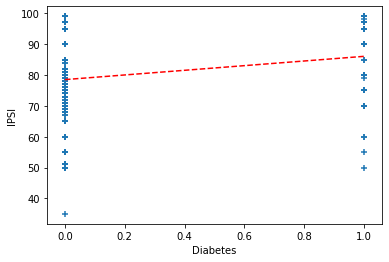

In [87]:
import numpy as np
plt.scatter(df1.Diabetes, df1.IPSI, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Diabetes == 0').IPSI), np.mean(df1.query('Diabetes == 1').IPSI)], 'r--')
plt.ylabel("IPSI")
plt.xlabel("Diabetes")
plt.show()

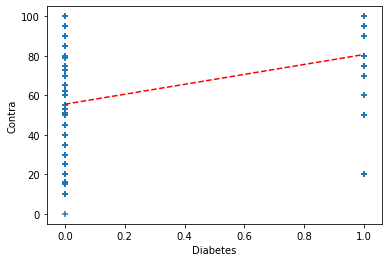

In [88]:
##the higher the level of ipsi the higher the chances of getting diabetes?
##doesnt seem significant though..

reg = smf.ols(formula = "Contra ~ Diabetes", data = df1).fit()
reg.summary()

plt.scatter(df1.Diabetes, df1.Contra, marker = "+")
plt.plot([0, 1], [np.mean(df1.query('Diabetes == 0').Contra), np.mean(df1.query('Diabetes == 1').Contra)], 'r--')
plt.ylabel("Contra")
plt.xlabel("Diabetes")
plt.show()

In [ ]:
##the higher the level of contra there is a much higher the chances of getting diabetes?
##seem to be more significant..